In [48]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
#Import data
data = pd.read_csv("C:\\Users\\thoma\\Desktop\\Data301\\Project\\project-group33\\data\\raw\\SharkAttacks_update.csv")
data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Unnamed: 14
0,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,NaN
1,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,NaN
2,09-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,NaN
3,08-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,NaN
4,04-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,NaN


In [50]:
#Clean, Process, and Wrangle Data
df = data[data.Year > 1799]\
          .drop(columns=['Date', 'Location', 'Name', 'Age', 'Injury', 'Time', 'Unnamed: 14'])\
          .dropna(subset=['Year','Country'])\
          .reset_index(drop=True)
df

,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Species
0,2018.0,Boating,USA,California,Paddling,F,N,White shark
1,2018.0,Unprovoked,USA,Georgia,Standing,F,N,NaN
2,2018.0,Invalid,USA,Hawaii,Surfing,M,N,NaN
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,2 m shark
4,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
6086,1804.0,Boat,AUSTRALIA,New South Wales,NaN,NaN,N,NaN
6087,1803.0,Sea Disaster,USA,South Carolina,NaN,M,N,NaN
6088,1803.0,Unprovoked,AUSTRALIA,Western Australia,NaN,M,N,NaN
6089,1802.0,Unprovoked,INDIA,NaN,NaN,NaN,Y,NaN


In [40]:
import sys
sys.path.append('/..')
from scripts import project_functions
df = project_functions.load_and_process("C:\\Users\\thoma\\Desktop\\Data301\\Project\\project-group33\\data\\raw\\SharkAttacks_update.csv")
df

ImportError: cannot import name 'project_functions' from 'scripts' (unknown location)

# EDA with:

At least three useful visualizations created by you (the more the merrier (within reason)!)

Some notes and commentary to help others see observations you find interesting.

In [29]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The profile report aided my brainstorming in discovering what potential research questions could be and in my EDA, I am showing three different visualizations. The first is a distribution for attack density by year. The next is attacks by country. The third visualization is fatalities by year with an additional hue of sex. Eventually I want to have a world map where I include the density of attacks per region.  

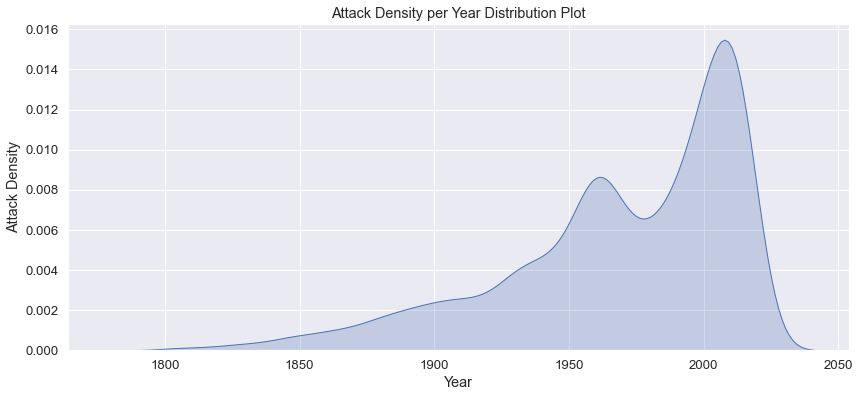

In [52]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 6))
 
# density plot with shaded area with kdeplot 'shade' parameter
EDA1 = sns.kdeplot(df['Year'], shade=True)
plt.title("Attack Density per Year Distribution Plot")
plt.ylabel("Attack Density")
plt.show(EDA1)

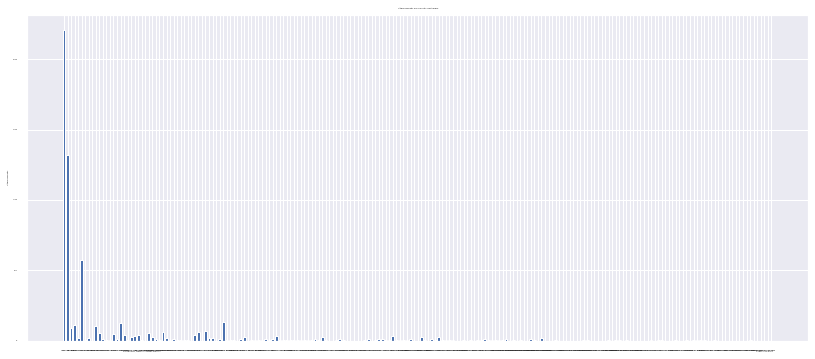

In [32]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 6))
from collections import Counter
a = Counter(df['Country'])

EDA2 = plt.bar(list(a.keys()), list(a.values()))
plt.title("Attack Density per Country Histogram")
plt.ylabel("Attack Density")
plt.show(EDA2)

In [35]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 6))

EDA3 = sns.barplot(x="Year", y="Fatal", data=df, hue="Sex") 

plt.title("Fatalities by Sex")
plt.ylabel("Fatalities")
plt.xlabel("Sex")
plt.show(EDA3)

ValueError: Could not interpret input 'Fatal'

<Figure size 1008x432 with 0 Axes>

In [46]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 6))
 
# density plot with shaded area with kdeplot 'shade' parameter
EDA4 = sns.lineplot(df['Year'], shade=True, hue=df['Sex'])
plt.title("Attack Density per Year Distribution Plot")
plt.ylabel("Attack Density")
plt.show(EDA4)

KeyError: 'Sex'

<Figure size 1008x432 with 0 Axes>

In [61]:
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 6))
from collections import Counter
a = Counter(list(df['Sex']))
a
#EDA6 = plt.bar(list(a.keys()), list(a.values()))
#plt.title("Attack Density per Country Histogram")
#plt.ylabel("Attack Density")
#plt.show(EDA6)

KeyError: 'Sex'

<Figure size 1008x432 with 0 Axes>

In [66]:
type(df['Fatal'])

KeyError: 'Fatal'

# This has been a very stressful week for me! I still need to work some details out I am aware, but I ask that you have some patience with me as I try to figure out more in this next week.